<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Flight Price Prediction</strong></p>

In [91]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')


# Importing dataset


In [92]:
df=pd.concat([pd.read_csv('/content/airline.csv'),pd.read_csv('/content/airline1.csv')],axis=0)
df

,Unnamed: 0,airline,date,source,price,d_t,a_t,t_t,stops,destination
0,0,IndiGo,06/10/2021,New Delhi,"6,375",21:55,00:05\n+ 1 day,2h 10m,Non Stop,mumbai
1,1,Air India,06/10/2021,New Delhi,"9,840",21:50,09:40\n+ 1 day,11h 50m,1 Stop,mumbai
2,2,Air India,06/10/2021,New Delhi,"9,840",21:50,23:30\n+ 1 day,25h 40m,1 Stop,mumbai
3,0,Air Asia,07/10/2021,New Delhi,"5,953",05:20,11:20,6h 00m,1 Stop,mumbai
4,1,Air Asia,07/10/2021,New Delhi,"5,953",12:40,20:15,7h 35m,1 Stop,mumbai
...,...,...,...,...,...,...,...,...,...,...
9989,59,Air India,09/01/2022,New Delhi,"7,273",09:45,17:50\n+ 1 day,32h 05m,2 Stop(s),Ahmedabad
9990,60,Air India,09/01/2022,New Delhi,"8,477",22:00,17:50\n+ 1 day,19h 50m,2 Stop(s),Ahmedabad
9991,61,Air India,09/01/2022,New Delhi,"8,477",10:55,17:50\n+ 1 day,30h 55m,2 Stop(s),Ahmedabad
9992,63,IndiGo,09/01/2022,New Delhi,"9,232",13:15,17:55,4h 40m,1 Stop,Ahmedabad


In [93]:
df.drop_duplicates(inplace=True)

In [94]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [95]:
df.info()   #information about the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38964 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   airline      38964 non-null  object
 1   date         38964 non-null  object
 2   source       38964 non-null  object
 3   price        38964 non-null  object
 4   d_t          38964 non-null  object
 5   a_t          38964 non-null  object
 6   t_t          38964 non-null  object
 7   stops        38964 non-null  object
 8   destination  38964 non-null  object
dtypes: object(9)
memory usage: 3.0+ MB


In [96]:
df['price']=[float(i.replace(',','')) for i in df['price']]

In [97]:
#describe about the data
df.describe(include='all')

,airline,date,source,price,d_t,a_t,t_t,stops,destination
count,38964,38964,38964,38964.000000,38964,38964,38964,38964,38964
unique,6,221,3,NaN,224,381,347,4,6
top,IndiGo,15/10/2021,New Delhi,NaN,08:00,10:10,2h 15m,1 Stop,mumbai
freq,11893,403,38834,NaN,1566,687,3087,20071,13597
mean,NaN,NaN,NaN,4873.488939,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2248.257366,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2098.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3515.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4203.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,5954.000000,NaN,NaN,NaN,NaN,NaN


In [98]:
df.shape

(38964, 9)

In [99]:
#finding the null values
df.isnull().sum()

airline        0
date           0
source         0
price          0
d_t            0
a_t            0
t_t            0
stops          0
destination    0
dtype: int64

<function matplotlib.pyplot.show>

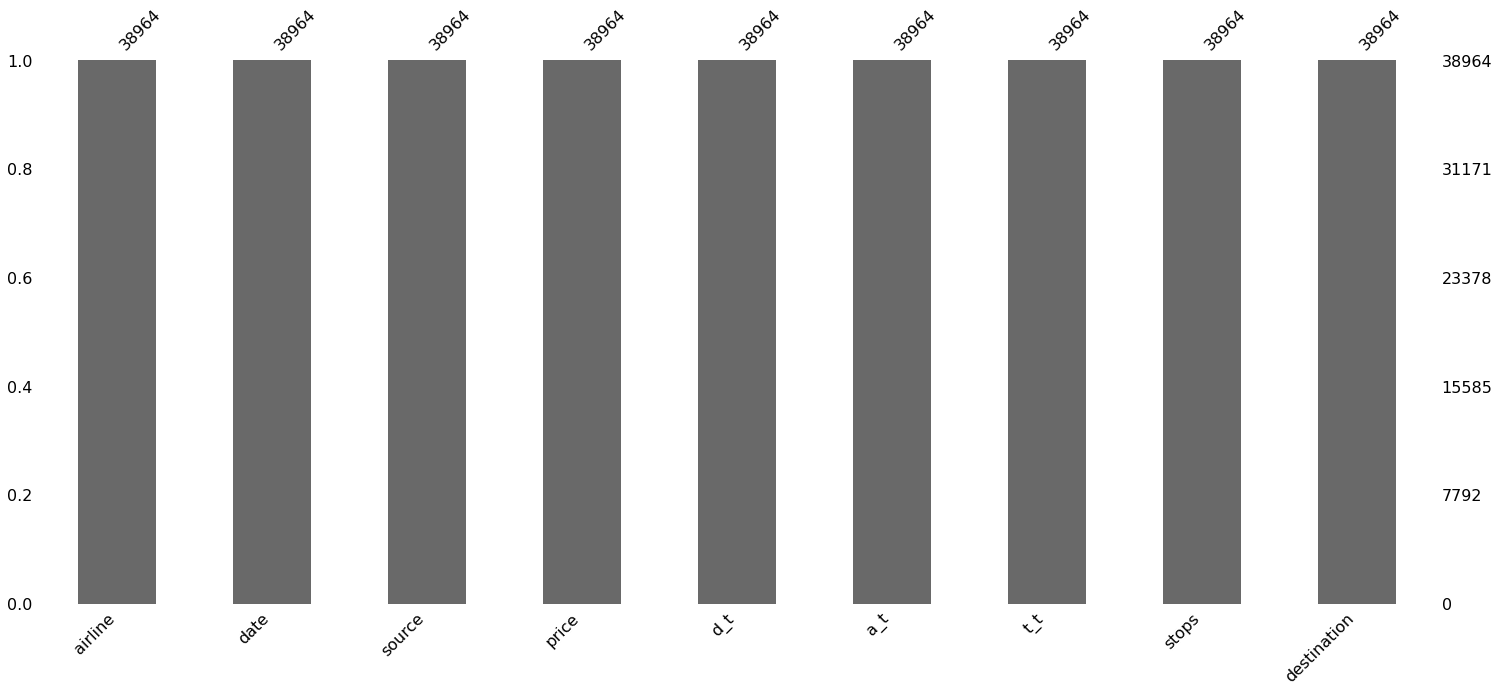

In [100]:
import missingno as msno
msno.bar(df)
plt.show

<a id = '5.5'></a>
<p style = "font-size : 25px; color : 'blue' ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Data Cleaning</strong></p>

In [101]:
df.dtypes # datatypes

airline         object
date            object
source          object
price          float64
d_t             object
a_t             object
t_t             object
stops           object
destination     object
dtype: object

In [102]:
df['a_t']=[dt.strptime(i.split('\n')[0],'%H:%M').strftime('%H.%M') for i in df['a_t']]

In [ ]:
df['date']=[dt.strptime(i,'%d/%m/%Y') for i in df['date']]

In [109]:
min={}
for i in df['destination'].unique():
  df_temp=df.loc[df['destination']==i]
  min[i]=list(df_temp['date'])[0]


In [110]:
min

{' mumbai': Timestamp('2021-10-06 00:00:00'),
 'Ahmedabad': Timestamp('2021-10-10 00:00:00'),
 'Bangalore': Timestamp('2021-10-07 00:00:00'),
 'Chennai': Timestamp('2021-10-07 00:00:00'),
 'Hyderabad': Timestamp('2021-10-10 00:00:00'),
 'Pune': Timestamp('2021-10-07 00:00:00')}

In [127]:
df.index=range(len(df))
diff=[d-min[df['destination'][i]] for i,d in enumerate(df['date'])]

In [129]:
df['diff']=[i.days for i in diff]

In [130]:
df['t_t']=[i.replace('h ','.').replace('m','') for i in df['t_t']]

In [131]:
df['stops']=[int(i.split()[0].replace('Non','0')) for i in df['stops']]

In [132]:
df.columns

Index(['airline', 'date', 'source', 'price', 'd_t', 'a_t', 't_t', 'stops',
       'destination', 'diff'],
      dtype='object')

In [133]:
df

,airline,date,source,price,d_t,a_t,t_t,stops,destination,diff
0,IndiGo,2021-10-06,New Delhi,6375.0,21.55,00.05,2.10,0,mumbai,0
1,Air India,2021-10-06,New Delhi,9840.0,21.50,09.40,11.50,1,mumbai,0
2,Air India,2021-10-06,New Delhi,9840.0,21.50,23.30,25.40,1,mumbai,0
3,Air Asia,2021-10-07,New Delhi,5953.0,05.20,11.20,6.00,1,mumbai,1
4,Air Asia,2021-10-07,New Delhi,5953.0,12.40,20.15,7.35,1,mumbai,1
...,...,...,...,...,...,...,...,...,...,...
38959,Air India,2022-01-09,New Delhi,7273.0,09.45,17.50,32.05,2,Ahmedabad,91
38960,Air India,2022-01-09,New Delhi,8477.0,22.00,17.50,19.50,2,Ahmedabad,91
38961,Air India,2022-01-09,New Delhi,8477.0,10.55,17.50,30.55,2,Ahmedabad,91
38962,IndiGo,2022-01-09,New Delhi,9232.0,13.15,17.55,4.40,1,Ahmedabad,91


In [134]:
df['a_t']=df['a_t'].astype('float')
df['d_t']=df['d_t'].astype('float')
df['t_t']=df['t_t'].astype('float')
df['date']=pd.to_datetime(df['date'],format='%d/%m/%Y')

In [135]:
df.dtypes

airline                object
date           datetime64[ns]
source                 object
price                 float64
d_t                   float64
a_t                   float64
t_t                   float64
stops                   int64
destination            object
diff                    int64
dtype: object

In [136]:
df['journey_day']=df['date'].dt.day
df['journey_month']=df['date'].dt.month
df['journey_week']=df['date'].dt.dayofweek

In [137]:
df.head(10)

,airline,date,source,price,d_t,a_t,t_t,stops,destination,diff,journey_day,journey_month,journey_week
0,IndiGo,2021-10-06,New Delhi,6375.0,21.55,0.05,2.10,0,mumbai,0,6,10,2
1,Air India,2021-10-06,New Delhi,9840.0,21.50,9.40,11.50,1,mumbai,0,6,10,2
2,Air India,2021-10-06,New Delhi,9840.0,21.50,23.30,25.40,1,mumbai,0,6,10,2
3,Air Asia,2021-10-07,New Delhi,5953.0,5.20,11.20,6.00,1,mumbai,1,7,10,3
4,Air Asia,2021-10-07,New Delhi,5953.0,12.40,20.15,7.35,1,mumbai,1,7,10,3
5,Air Asia,2021-10-07,New Delhi,5953.0,11.55,20.15,8.20,1,mumbai,1,7,10,3
6,Air Asia,2021-10-07,New Delhi,5953.0,8.00,16.35,8.35,1,mumbai,1,7,10,3
7,Air Asia,2021-10-07,New Delhi,5953.0,18.35,6.20,11.45,1,mumbai,1,7,10,3
8,Air Asia,2021-10-07,New Delhi,5953.0,16.15,6.20,14.05,1,mumbai,1,7,10,3
9,Air Asia,2021-10-07,New Delhi,5953.0,5.20,20.15,14.55,1,mumbai,1,7,10,3


In [138]:
df.drop('source', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

##### Lets Apply pre-processing on duration 

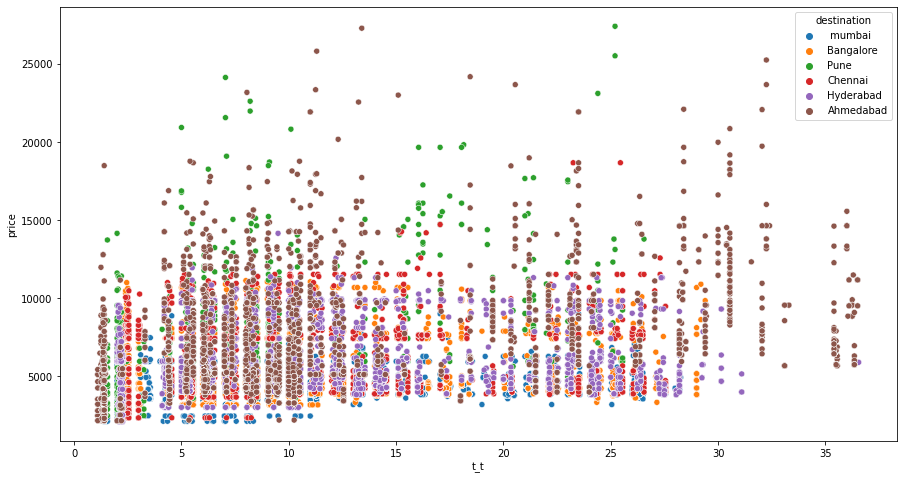

In [139]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='t_t',y='price',data=df,hue='destination')

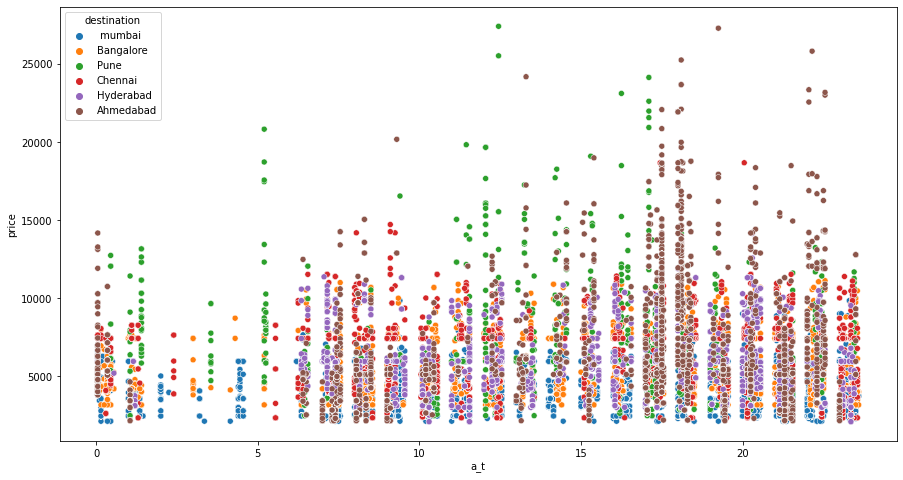

In [140]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='a_t',y='price',data=df,hue='destination')

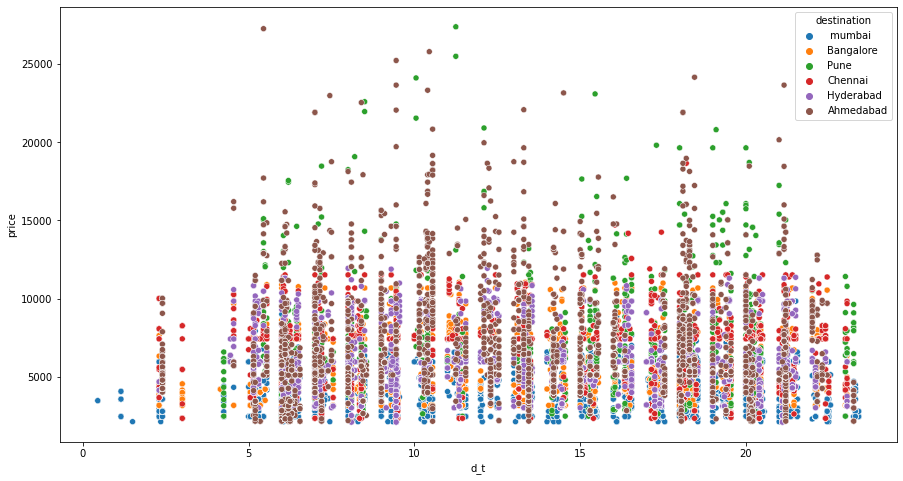

In [141]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='d_t',y='price',data=df,hue='destination')

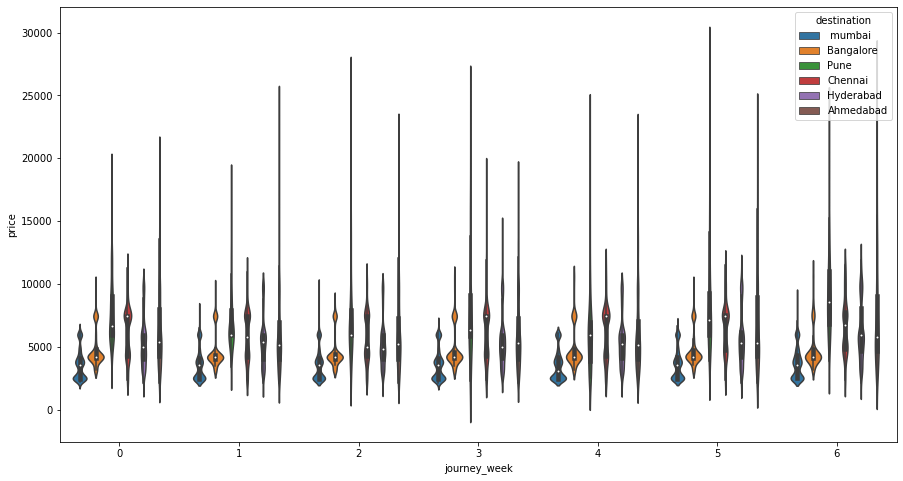

In [142]:
plt.figure(figsize=(15,8))
sns.violinplot(x='journey_week',y='price',data=df,hue='destination')

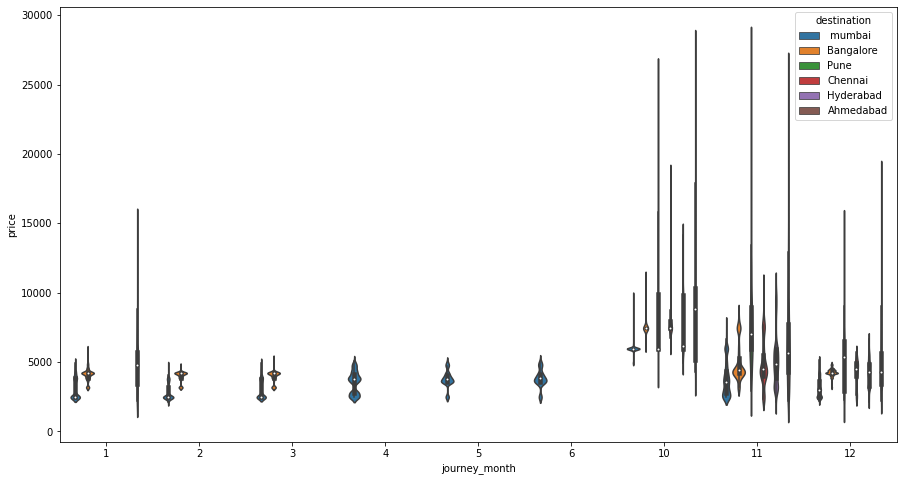

In [143]:
plt.figure(figsize=(15,8))
sns.violinplot(x='journey_month',y='price',data=df,hue='destination')

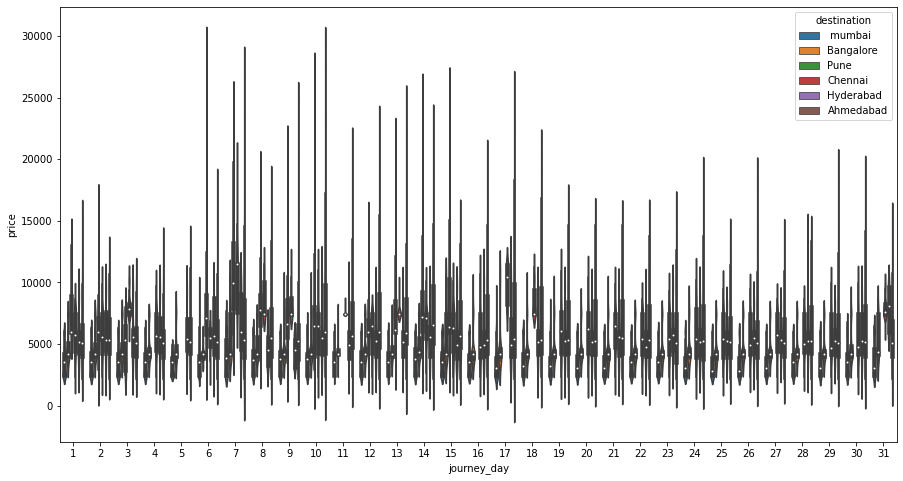

In [144]:
plt.figure(figsize=(15,8))
sns.violinplot(x='journey_day',y='price',data=df,hue='destination')

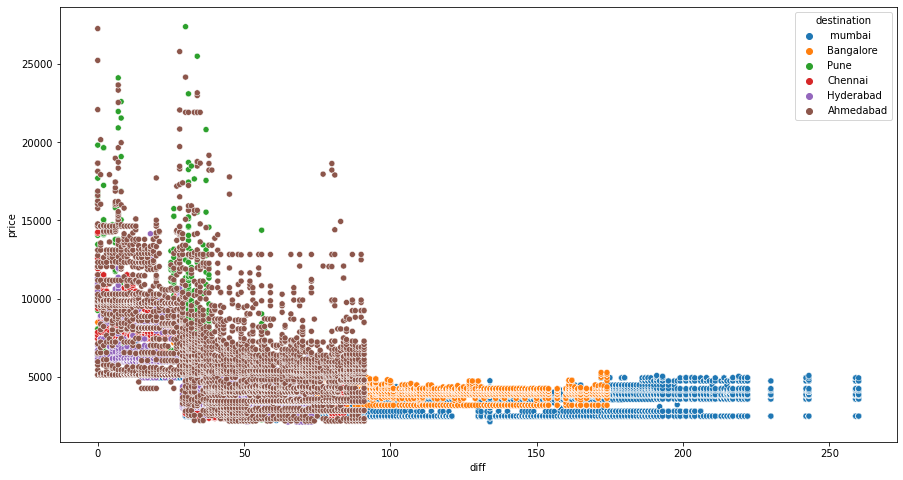

In [145]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='diff',y='price',data=df,hue='destination')

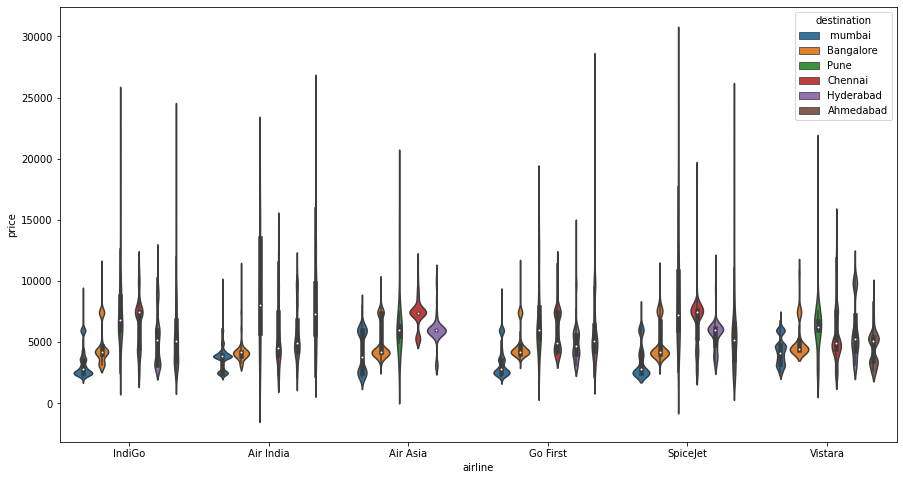

In [146]:
plt.figure(figsize=(15,8))
sns.violinplot(x='airline',y='price',data=df,hue='destination')

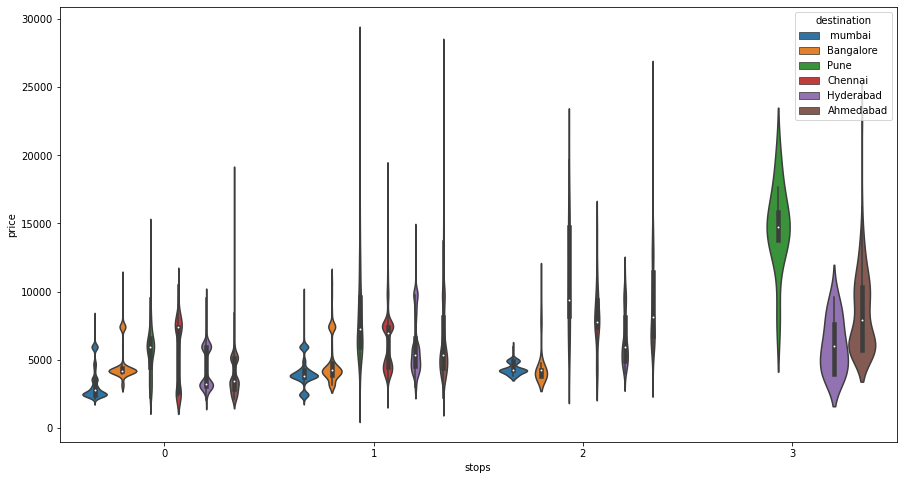

In [147]:
plt.figure(figsize=(15,8))
sns.violinplot(x='stops',y='price',data=df,hue='destination')

In [148]:
df.dtypes

airline           object
price            float64
d_t              float64
a_t              float64
t_t              float64
stops              int64
destination       object
diff               int64
journey_day        int64
journey_month      int64
journey_week       int64
dtype: object

#### Finding the categorical value

In [149]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['airline', 'destination']

#### Finding the cntinuous value

In [150]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['price',
 'd_t',
 'a_t',
 't_t',
 'stops',
 'diff',
 'journey_day',
 'journey_month',
 'journey_week']

# Handling categorical data




### We are using two main Encoding Techniques to covert Categorical data into some numerical format

#### Nominal data -- Data that are not in any order -->one hot encoding
#### ordinal data -- Data are in order --> labelEncoder

In [151]:
categorical = df[column]

In [152]:
categorical.head()

,airline,destination
0,IndiGo,mumbai
1,Air India,mumbai
2,Air India,mumbai
3,Air Asia,mumbai
4,Air Asia,mumbai


In [153]:
categorical['airline'].value_counts()

IndiGo       11893
Air India     9575
Go First      6569
Vistara       4591
SpiceJet      3873
Air Asia      2463
Name: airline, dtype: int64

In [154]:
df_final=pd.concat([df.drop(['airline','destination'],axis=1),pd.get_dummies(df['airline']),pd.get_dummies(df['destination'])],axis=1)

## Check For Outliers 


In [155]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

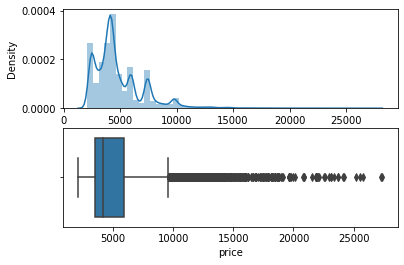

In [156]:
plot(df_final,'price')

###  Handling outliers:
#### As there is some outliers in price feature,so we replace it  with median.

In [157]:
df_final['lg_price']=np.log(df_final['price'])

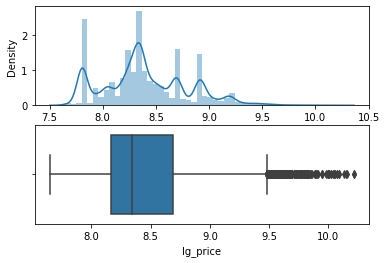

In [158]:
plot(df_final,'lg_price')

In [159]:
df_final=df_final[(df_final['lg_price']<9.5)]

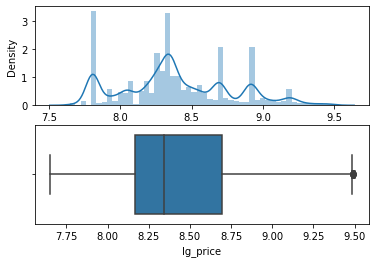

In [160]:
plot(df_final,'lg_price')

In [161]:
df_final.drop('price',axis=1,inplace=True)

In [162]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38680 entries, 0 to 38963
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   d_t            38680 non-null  float64
 1   a_t            38680 non-null  float64
 2   t_t            38680 non-null  float64
 3   stops          38680 non-null  int64  
 4   diff           38680 non-null  int64  
 5   journey_day    38680 non-null  int64  
 6   journey_month  38680 non-null  int64  
 7   journey_week   38680 non-null  int64  
 8   Air Asia       38680 non-null  uint8  
 9   Air India      38680 non-null  uint8  
 10  Go First       38680 non-null  uint8  
 11  IndiGo         38680 non-null  uint8  
 12  SpiceJet       38680 non-null  uint8  
 13  Vistara        38680 non-null  uint8  
 14   mumbai        38680 non-null  uint8  
 15  Ahmedabad      38680 non-null  uint8  
 16  Bangalore      38680 non-null  uint8  
 17  Chennai        38680 non-null  uint8  
 18  Hydera

### Seprate the dataset in X and Y columns

In [163]:
df_final.index=range(len(df_final))

In [164]:
x=df_final.drop('lg_price',axis=1)
y=df_final['lg_price']

# Feature Selection 
It is about finding the best feature and having good relation with independent variable                                  
Issue of dimensionality reduction reduces.

For this we use mutual_info_classif

In [165]:
from sklearn.feature_selection import SelectKBest,f_classif
s = SelectKBest(f_classif, k=12)
s.fit(x,y)


SelectKBest(k=12, score_func=<function f_classif at 0x7f2a62be2b90>)

In [166]:
pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)

,0,1
journey_week,2.419644,1.666559e-171
journey_day,3.492815,0.000000e+00
d_t,3.657745,0.000000e+00
a_t,6.244753,0.000000e+00
SpiceJet,26.615013,0.000000e+00
Pune,29.617443,0.000000e+00
journey_month,30.366016,0.000000e+00
IndiGo,34.110884,0.000000e+00
Air Asia,43.316693,0.000000e+00
t_t,57.042517,0.000000e+00


As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

# Models

In [167]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=123)

In [168]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train_scaler=ss.transform(x_train)
x_test_scaler=ss.transform(x_test)

# **Model Evaluation**

In [169]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)      
          

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor 



Model is: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Training score: 0.9930515467661915
Predictions are: [8.54765938 8.28073592 7.93788446 ... 8.34291707 8.31552758 8.69437773]


r2 score is: 0.9545112860486042
MAE:0.03676922463285956
MSE:0.006919234004793387
RMSE:0.08318193316335817


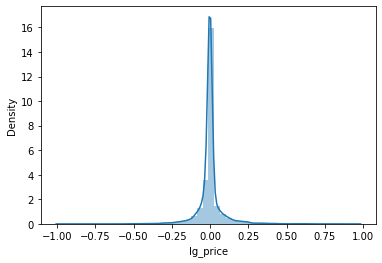

In [171]:

predict(RandomForestRegressor())

Model is: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Training score: 0.8956821434116394
Predictions are: [8.71127807 8.33262051 8.03771391 ... 8.25504577 8.24870546 8.8659707 ]


r2 score is: 0.8322156945666491
MAE:0.11007239303759217
MSE:0.02552147050948798
RMSE:0.1597544068546717


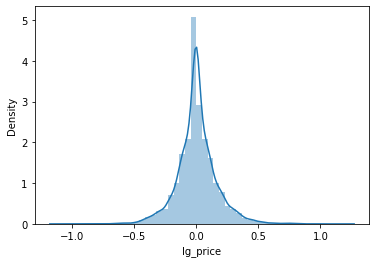

In [172]:
predict(KNeighborsRegressor())


Model is: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Training score: 0.9999071326194657
Predictions are: [8.5399026  8.26950077 8.01135511 ... 8.34300544 8.31066091 8.7772471 ]


r2 score is: 0.9191820783803112
MAE:0.0384138472775046
MSE:0.012293117630566014
RMSE:0.11087433260482794


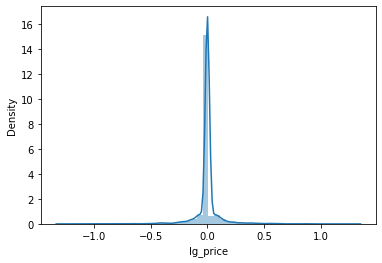

In [173]:
predict(DecisionTreeRegressor())

Model is: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
[13:03:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score: 0.8664907835415965
Predictions are: [8.63431   8.310259  7.9954057 ... 8.328802  8.320489  8.90605  ]


r2 score is: 0.8628249292734045
MAE:0.0995168524357687
MSE:0.020865536339311572
RMSE:0.14444907870703633


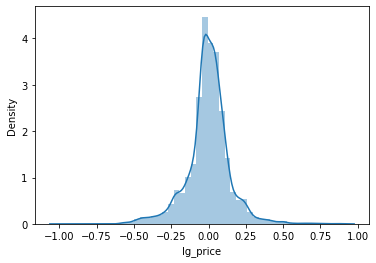

In [174]:

predict(XGBRegressor())

Model is: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Training score: 0.8685067383610635
Predictions are: [8.62697204 8.31516494 7.97781283 ... 8.34259925 8.32813246 8.91693425]


r2 score is: 0.8651174401439994
MAE:0.09901636660772531
MSE:0.020516825246069247
RMSE:0.14323695488968358


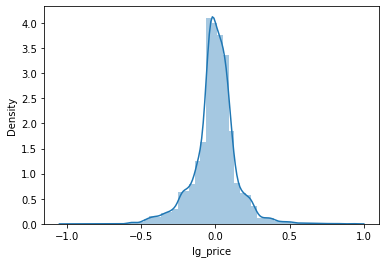

In [175]:
predict(GradientBoostingRegressor())

Random forest has best result 

# Hypertunning the model

In [176]:
from sklearn.model_selection import RandomizedSearchCV


In [177]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [178]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.2min finished


{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 150}

In [179]:
# best parameter
rf_random.best_params_

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 150}

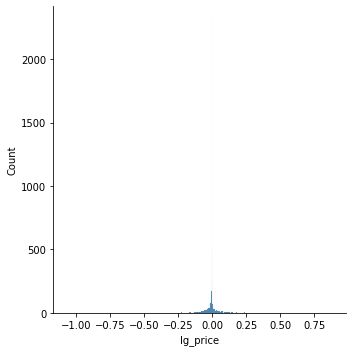

In [180]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [181]:
r2_score(y_test,prediction)

0.9544350482311661

# **Saving the model** 

In [182]:
import pickle

filename = '/content/model.sav'
pickle.dump(rf_random, open(filename, 'wb'))

# **Conclusion**

In [183]:

filename = '/content/model.sav'
model = pickle.load(open(filename, 'rb'))

In [184]:
y_pred = model.predict(x)

In [185]:
pd.concat([pd.DataFrame(np.exp(y_pred)),pd.DataFrame(np.exp(y))],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,38640,38641,38642,38643,38644,38645,38646,38647,38648,38649,38650,38651,38652,38653,38654,38655,38656,38657,38658,38659,38660,38661,38662,38663,38664,38665,38666,38667,38668,38669,38670,38671,38672,38673,38674,38675,38676,38677,38678,38679
0,6248.107261,7450.622552,8935.193941,5953.893201,5953.918684,5953.918684,5953.930861,5953.926225,5953.926225,5953.883028,5962.935667,5959.463909,5954.639928,5956.025064,5954.6529,5953.94064,5953.934687,5953.936815,5953.930861,5953.930861,5984.661115,5975.39714,5954.997263,5964.604323,5967.35878,5956.775407,5986.652159,5954.997263,5985.994775,5954.997263,5955.391494,5954.697588,5954.997263,5954.725862,5989.756946,5954.997263,5957.449525,5954.996995,5956.121481,5958.950888,...,4427.214517,4849.935228,4827.589134,4861.98983,4824.096692,4540.402081,4969.478964,4732.01754,4996.907674,4789.44034,5359.884688,5684.530395,5368.480107,5179.46721,5644.534652,5424.983247,5424.983247,5802.487482,5744.67698,5903.980948,5789.543887,5755.716943,6007.353708,6112.072117,6916.316566,6979.661434,6643.682241,6577.790156,6906.199385,6726.631766,6746.290798,5430.799674,6916.316566,6979.661434,7114.796112,7331.516998,8634.681272,8781.03001,7914.898258,7404.602113
lg_price,6375.000000,9840.000000,9840.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5954.000000,5954.000000,5954.000000,5954.0000,5954.00000,5954.000000,5954.000000,5954.000000,5954.000000,5955.000000,5955.00000,5955.000000,5955.000000,5955.00000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,...,4260.000000,4670.000000,4787.000000,4787.00000,4787.000000,4787.000000,4787.000000,4787.00000,4787.000000,4787.00000,5189.000000,5336.000000,5336.000000,5336.00000,5378.000000,5430.000000,5430.000000,5673.000000,5673.00000,5744.000000,5744.000000,5745.000000,5945.000000,6106.000000,6436.000000,6436.000000,6438.000000,6438.000000,6743.000000,6743.000000,6743.000000,6880.000000,7066.000000,7066.000000,7273.000000,7273.000000,8477.000000,8477.00000,9232.000000,9232.000000
